Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
NAME = "Nick"
COLLABORATORS = "Nick"

---

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Часть I. Метод Ньютона нахождения корней уравнения.

Напишите алгоритм, который выполняет итерации Ньютона для заданной функции $f(x)$ с известной производной $f'(x)$. Ваша функция должна находить корни $f(x)$ с заданной точностью $\epsilon$.

In [3]:
def newton_iteration(f, fder, x0, eps=1e-5, maxiter=100):
    """Нахождение корней $f(x) = 0$ через итерации Ньютона.
    
    Parameters
    ----------
    f : callable
        Функция, корни которой мы хотим найти.
    fder : callable
        Производная `f`.
    x0 : float
        Начальное приближение итераций Ньютона.
    eps : float
        Заданная точность. 
        Алгоритм прекращает работу когда расстояние между последовательными приближениями меньше `eps`.
        По умолчанию 1e-5.
    maxiter : int
        Максимальное число итераций (по умолчанию 100).
        Алгоритм прекращается, когда число итераций достигает `maxiter`.
        Этот параметр нужен лишь для предотвращения бесконечного зацикливания.
    
    Returns
    -------
    x : float
        Найденное приближение к корню.
    niter : int
        Количество итераций.
    """
    x = x0
    iters = 0
    
    while True:
        X = x - f(x) / fder(x)
        iters += 1
        if abs(X - x) < eps or iters >= maxiter:
            return X, iters
        else:
            x = X

In [4]:
from numpy.testing import assert_allclose

xx, nit = newton_iteration(lambda x: x**2 - 1, lambda x: 2.*x, x0=4)
assert_allclose(xx, 1.0, atol=1e-5)
assert nit < 10

xx, nit = newton_iteration(lambda x: x**2 - 1, lambda x: 2.*x, x0=-4)
assert_allclose(xx, -1.0, atol=1e-5)
assert nit < 10


from math import log, exp

xx, nit = newton_iteration(lambda x: exp(x)-2, lambda x: exp(x), x0=4, eps=1e-10)
assert_allclose(xx, log(2), atol=1e-10)

Используя функцию `newton_iteration` для функции $f(x) = x^2 - 1$, постройте зависимость логарифма ошибки нахождения корня методом Ньютона от числа итераций. Какова сходимость метода (линейная, квадратичная, иная)?

### Your code here.

/home/kotya/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log
  


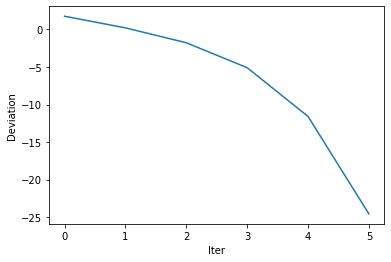

In [5]:
f = lambda x: x ** 2 - 1
fder = lambda x: 2 * x
error_list = list()
x = -5
iters = 100 # 5
for i in range(iters):
    x, n = newton_iteration(f, fder, x, 1e-10, 1)
    error_list.append(np.log(abs(f(x))))
plt.plot(error_list)
plt.xlabel('Iter')
plt.ylabel('Deviation');

Сходимость метода выглядит сверхлинейной. Похожа на квадратичную

# Часть II. Модифицированный метод Ньютона для кратных корней.

Рассмотрим функцию, имеющую кратный корень (например, $f(x) = (x^2 - 1)^2$). Реализуйте модифицированную итерацию Ньютона, 

$$
x_{n+1} = x_{n} - m \frac{f(x_n)}{f'(x_n)}
$$

In [6]:
def mod_newton(f, fder, x0, m, eps=1e-5, maxiter=100):
    """Нахождение корней $f(x) = 0$ через итерации Ньютона.
    
    Parameters
    ----------
    f : callable
        Функция, корни которой мы хотим найти.
    fder : callable
        Производная `f`.
    x0 : float
        Начальное приближение итераций Ньютона.
    eps : float
        Заданная точность. 
        Алгоритм прекращает работу когда расстояние между последовательными приближениями меньше `eps`.
        По умолчанию 1e-5.
    maxiter : int
        Максимальное число итераций (по умолчанию 100).
        Алгоритм прекращается, когда число итераций достигает `maxiter`.
        Этот параметр нужен лишь для преcдотвращения бесконечного зацикливания.
    
    Returns
    -------
    x : float
        Найденное приближение к корню.
    niter : int
        Количество итераций.
    """
    # YOUR CODE HERE
    x = x0
    iters = 0
    
    while True:
        x = x - m * f(x) / fder(x)
        iters += 1
        if abs(x - x) < eps or iters >= maxiter:
            return x, iters
        else:
            x = x

In [7]:
for m in [1, 2, 3, 4, 5, 6]:
    xx, nit = mod_newton(lambda x: (x**2 - 1)**4,
                         lambda x: 4*(x**2 - 1)**3 * 2 * x,
                         x0=2, m=m, maxiter=10000, eps=1e-9)
    assert_allclose(xx, 1.0, atol=1e-8)
    
### BEGIN HIDDEN TESTS
num_iters = []

for m in [1, 2, 3, 4, 5, 6]:
    xx, nit = mod_newton(lambda x: (x**2 - 1)**4,
                         lambda x: 4*(x**2 - 1)**3 * 2 * x,
                         x0=2, m=m, maxiter=10000, eps=1e-9)
    num_iters.append(nit)
    
assert num_iters[3] < 10
assert all(_ > 10 for _ in num_iters[:3])
assert all(_ > 10 for _ in num_iters[4:])
### END HIDDEN TESTS

AssertionError: 
Not equal to tolerance rtol=1e-07, atol=1e-08

Mismatched elements: 1 / 1 (100%)
Max absolute difference: 0.8125
Max relative difference: 0.8125
 x: array(1.8125)
 y: array(1.)

Используйте модифицированную итерацию Ньютона для функции $f(x) = (x^2 - 1)^2$ со значениями  $m= 1, 2, 3, 4, 5, 6$. Сколько итераций требуется для достижения сходимости с фиксированным значением $\epsilon$? Согласуются ли ваши наблюдения с предсказанием о квадратичной сходимости метода при значении $m$ равном кратности корня, и линейной сходимости для остальных значений $m$?

### Your code here.

In [8]:
m_list = [1, 2, 3, 4, 5, 6]
iter_list = list()
x0 = 2
for m in m_list:
    x, n = mod_newton(lambda x: (x ** 2 - 1) ** 2,
                         lambda x: 2 * ( x** 2 - 1) * 2 * x,
                         x0=2, m=m, maxiter=10000, eps=1e-9)
    iter_list.append(n)
for i, it in enumerate(iter_list):
    print('m = {}, итераций потребовалось: {}'.format(i + 1, it))

m = 1, итераций потребовалось: 1
m = 2, итераций потребовалось: 1
m = 3, итераций потребовалось: 1
m = 4, итераций потребовалось: 1
m = 5, итераций потребовалось: 1
m = 6, итераций потребовалось: 1


Если сравнивать число итераций при m 1, 2 и 3, то при m = 1 или 3 сходимость линейная, при m = 2 сходимость квадратичная. Для остальных m сходимость хуже линейной: метод просто не сходится

# Часть III. Метод Ньютона для системы нелинейных уравнений.

Напишите алгоритм, который выполняет итерации Ньютона для заданной системы нелинейных уравнений $\vec{f}(x) = 0$ с известной матрицей Якоби $J(x)$. Ваша функция должна находить корни вектор-функции $\vec{f}(x)$ с заданной точностью $\epsilon$.

In [9]:
def newton_system(F, jcb, X0, eps=1e-5, maxiter=100):
    """Нахождение корней $f(x) = 0$ через итерации Ньютона.
    
    Parameters
    ----------
    F : callable
        Вектор-функция системы, которую мы хотим решить.
    jcb : callable
        Производная `f`.
    X0 : array-like of floats, shape (n,)
        Начальное приближение итераций Ньютона.
    eps : float
        Заданная точность. 
        Алгоритм прекращает работу когда расстояние между последовательными приближениями меньше `eps`.
        По умолчанию 1e-5.
    maxiter : int
        Максимальное число итераций (по умолчанию 100).
        Алгоритм прекращается, когда число итераций достигает `maxiter`.
        Этот параметр нужен лишь для предотвращения бесконечного зацикливания.
    
    Returns
    -------
    X : array-like of floats, shape (n,)
        Найденное приближение к корню.
    niter : int
        Количество итераций.
    """
    X = X0
    iters = 0
    while True:
        J = jcb(X)
        X_new = np.linalg.solve(J, J @ X - F(X))
        iters += 1
        if np.linalg.norm(X_new - X) < eps or iters >= maxiter:
            return X_new, iters
        else:
            X = X_new

In [10]:
from numpy.testing import assert_allclose

def func(X):
    return np.array([X[0]**2 - 2*X[1]**4 + 1, X[0] - X[1]**3 + 1])

def jac(X):
    return np.array([[2.*X[0], -8.*X[1]**3],
                       [1., -3.*X[1]**2]])

xx, nit = newton_system(func, jac, np.array([3., 2.]))
assert_allclose(xx, np.array([4.02879487, 1.71325223]), atol=1e-5)
assert nit < 10

xx, nit = newton_system(func, jac, np.asarray([1., 2.]))
assert_allclose(xx, np.asarray([-0.35119943,  0.86570596]), atol=1e-5)
assert nit < 10


### BEGIN HIDDEN TESTS
def func(X):
    x,y,z=X
    return np.array([x**2+y**2+z**2-25, x*y+y*z+z*x-5,x+y-3])

def jac(X):
    x,y,z=X
    return np.array([[2*x, 2*y, 2*z], [y+z, x+z, x+y], [1, 1, 0]])

xx, nit = newton_system(func, jac, np.asarray([4., 0., 3.]))
assert_allclose(xx, np.array([0.5*(3+np.sqrt(12*np.sqrt(35)-47)),
                              0.5*(3-np.sqrt(12*np.sqrt(35)-47)), 
                              np.sqrt(35)-3]), atol=1e-5)
assert nit < 10

xx, nit = newton_system(func, jac, np.asarray([1., 4., 3.]))
assert_allclose(xx, np.array([0.5*(3-np.sqrt(12*np.sqrt(35)-47)),
                              0.5*(3+np.sqrt(12*np.sqrt(35)-47)),
                              np.sqrt(35)-3]), atol=1e-5)
assert nit < 10
### END HIDDEN TESTS